In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Put unlimited max columns when displaying dataframes
pd.set_option('display.max_columns', None)

In [3]:
df2023_2024 = pd.read_excel("DATOS HISTÓRICOS 2023_2024_TODAS ESTACIONES_ITESM.xlsx")
df2022_2023 = pd.read_excel("DATOS HISTÓRICOS 2022_2023_TODAS ESTACIONES.xlsx", sheet_name=None)
df2020_2021 = pd.read_excel("DATOS HISTÓRICOS 2020_2021_TODAS ESTACIONES.xlsx", sheet_name=None)


# Parte 1
## A) Dimensión de la base de datos

In [4]:
#Obtener shape de cada dataframe
print("Shape de df2023_2024: ", df2023_2024.shape)
for key in df2022_2023:
    print("Shape de df2022_2023: ", key , df2022_2023[key].shape)
for key in df2020_2021:
    print("Shape de df2020_2021: ", key , df2020_2021[key].shape)


Shape de df2023_2024:  (13872, 240)
Shape de df2022_2023:  SURESTE (14255, 16)
Shape de df2022_2023:  NORESTE (14255, 16)
Shape de df2022_2023:  CENTRO (14255, 16)
Shape de df2022_2023:  NOROESTE (14255, 16)
Shape de df2022_2023:  SUROESTE (14255, 16)
Shape de df2022_2023:  NOROESTE2 (14255, 16)
Shape de df2022_2023:  NORTE (14255, 16)
Shape de df2022_2023:  SUROESTE2 (14255, 16)
Shape de df2022_2023:  SURESTE2 (14255, 16)
Shape de df2022_2023:  SURESTE3 (14255, 16)
Shape de df2022_2023:  SUR (14254, 16)
Shape de df2022_2023:  NORTE2 (14255, 16)
Shape de df2022_2023:  NORESTE2 (14255, 16)
Shape de df2022_2023:  NORESTE3 (14254, 16)
Shape de df2022_2023:  NOROESTE3 (6237, 16)
Shape de df2022_2023:  CATÁLOGO (15, 3)
Shape de df2020_2021:  SURESTE (17538, 16)
Shape de df2020_2021:  NORESTE (17535, 16)
Shape de df2020_2021:  CENTRO (17536, 16)
Shape de df2020_2021:  NOROESTE (17537, 16)
Shape de df2020_2021:  SUROESTE (17537, 16)
Shape de df2020_2021:  NOROESTE2 (17535, 16)
Shape de df2020

# Parte 2
## A) Selecciona el conjunto de datos a utilizar
Decide qué conjunto de datos se utilizará. Explica por qué se incluyeron o excluyeron ciertos datos.
Identifica las columnas objetivo


Bases de datos seleccionadas: Datos historicos 2023-2024, Datos historicos 2022-2023, Datos historicos 2020-2021 y datos históricos 2021.
Estas bases se seleccionaron pues son las más recientes, completas y presentan un formato similar para su análisis. Al ser series de tiempo se pueden juntar entre ellas para hacer un análisis más completo.
Las columnas objetivo seria tener cada columna con el formato "Estación Contaminante (medida)", indexados por su fecha, de manera que se puedan almacenar los datos como una serie de tiempo durante los 4 años.

# Hacer columnas similares para cada base de datos

Preparación de 2023-2024

In [5]:
df2023_2024.loc[0,:] = df2023_2024.loc[0,:].fillna("A") #Se rellena un valor de A para que no haya problemas al juntar las entradas
df2023_2024.columns = df2023_2024.columns.str.split('.').str[0] #Se toma el nombre de la columna sin el .1 o .2
df2023_2024 = df2023_2024.replace("WDV", "WDR") # Se cambia el nombre de la columna WDV a WDR, puesto que en las demas bases de datos es WDR
df2023_2024.columns = (df2023_2024.columns + " " + df2023_2024.loc[0] + " (" + df2023_2024.loc[1] +")").str.upper() #Se junta el nombre de la medida, con la estacion
df2023_2024.drop([0,1], inplace=True) # Se eliminan las filas que contenian los nombres de las columnas
df2023_2024.rename(columns={"UNNAMED: 0 A (DATE)": "FECHA"}, inplace=True) #Se cambia el nombre de la columna de fecha
df2023_2024["FECHA"] = pd.to_datetime(df2023_2024["FECHA"]) # Se convierte la columna de fecha a datetime
#Se cambiar el nombre de las columnas para que coincidan con las demas bases de datos
df2023_2024.columns = df2023_2024.columns.str.replace("SURESTE2", "SURESTE 2")
df2023_2024.columns = df2023_2024.columns.str.replace("NORESTE2", "NORESTE 2")
df2023_2024.columns = df2023_2024.columns.str.replace("SUROESTE2", "SUROESTE 2")

C:\Users\progra.DESKTOP-GV4Q93K\AppData\Local\Temp\ipykernel_18268\3519800603.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'A' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df2023_2024.loc[0,:] = df2023_2024.loc[0,:].fillna("A") #Se rellena un valor de A para que no haya problemas al juntar las entradas
C:\Users\progra.DESKTOP-GV4Q93K\AppData\Local\Temp\ipykernel_18268\3519800603.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'A' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df2023_2024.loc[0,:] = df2023_2024.loc[0,:].fillna("A") #Se rellena un valor de A para que no haya problemas al juntar las entradas
C:\Users\progra.DESKTOP-GV4Q93K\AppData\Local\Temp\ipykernel_18268\3519800603.py:1: FutureWarning: Setting an item of inco

In [6]:
df2023_2024

,FECHA,SURESTE CO (PPM),SURESTE NO (PPB),SURESTE NO2 (PPB),SURESTE NOX (PPB),SURESTE O3 (PPB),SURESTE PM10 (UG/M3),SURESTE PM2.5 (UG/M3),SURESTE PRS (MMHG),SURESTE RAINF (MM/HR),SURESTE RH (%),SURESTE SO2 (PPB),SURESTE SR (KW/M2),SURESTE TOUT (DEGC),SURESTE WSR (KMPH),SURESTE WDR (DEG),NaN,NORESTE CO (PPM),NORESTE NO (PPB),NORESTE NO2 (PPB),NORESTE NOX (PPB),NORESTE O3 (PPB),NORESTE PM10 (UG/M3),NORESTE PM2.5 (UG/M3),NORESTE PRS (MMHG),NORESTE RAINF (MM/HR),NORESTE RH (%),NORESTE SO2 (PPB),NORESTE SR (KW/M2),NORESTE TOUT (DEGC),NORESTE WSR (KMPH),NORESTE WDR (DEG),NaN,CENTRO CO (PPM),CENTRO NO (PPB),CENTRO NO2 (PPB),CENTRO NOX (PPB),CENTRO O3 (PPB),CENTRO PM10 (UG/M3),CENTRO PM2.5 (UG/M3),CENTRO PRS (MMHG),CENTRO RAINF (MM/HR),CENTRO RH (%),CENTRO SO2 (PPB),CENTRO SR (KW/M2),CENTRO TOUT (DEGC),CENTRO WSR (KMPH),CENTRO WDR (DEG),NaN,NOROESTE CO (PPM),NOROESTE NO (PPB),NOROESTE NO2 (PPB),NOROESTE NOX (PPB),NOROESTE O3 (PPB),NOROESTE PM10 (UG/M3),NOROESTE PM2.5 (UG/M3),NOROESTE PRS (MMHG),NOROESTE RAINF (MM/HR),NOROESTE RH (%),NOROESTE SO2 (PPB),NOROESTE SR (KW/M2),NOROESTE TOUT (DEGC),NOROESTE WSR (KMPH),NOROESTE WDR (DEG),NaN,SUROESTE CO (PPM),SUROESTE NO (PPB),SUROESTE NO2 (PPB),SUROESTE NOX (PPB),SUROESTE O3 (PPB),SUROESTE PM10 (UG/M3),SUROESTE PM2.5 (UG/M3),SUROESTE PRS (MMHG),SUROESTE RAINF (MM/HR),SUROESTE RH (%),SUROESTE SO2 (PPB),SUROESTE SR (KW/M2),SUROESTE TOUT (DEGC),SUROESTE WSR (KMPH),SUROESTE WDR (DEG),NaN,NOROESTE 2 CO (PPM),NOROESTE 2 NO (PPB),NOROESTE 2 NO2 (PPB),NOROESTE 2 NOX (PPB),NOROESTE 2 O3 (PPB),NOROESTE 2 PM10 (UG/M3),NOROESTE 2 PM2.5 (UG/M3),NOROESTE 2 PRS (MMHG),NOROESTE 2 RAINF (MM/HR),NOROESTE 2 RH (%),NOROESTE 2 SO2 (PPB),NOROESTE 2 SR (KW/M2),NOROESTE 2 TOUT (DEGC),NOROESTE 2 WSR (KMPH),NOROESTE 2 WDR (DEG),NaN,NORTE CO (PPM),NORTE NO (PPB),NORTE NO2 (PPB),NORTE NOX (PPB),NORTE O3 (PPB),NORTE PM10 (UG/M3),NORTE PM2.5 (UG/M3),NORTE PRS (MMHG),NORTE RAINF (MM/HR),NORTE RH (%),NORTE SO2 (PPB),NORTE SR (KW/M2),NORTE TOUT (DEGC),NORTE WSR (KMPH),NORTE WDR (DEG),NaN,NORESTE 2 CO (PPM),NORESTE 2 NO (PPB),NORESTE 2 NO2 (PPB),NORESTE 2 NOX (PPB),NORESTE 2 O3 (PPB),NORESTE 2 PM10 (UG/M3),NORESTE 2 PM2.5 (UG/M3),NORESTE 2 PRS (MMHG),NORESTE 2 RAINF (MM/HR),NORESTE 2 RH (%),NORESTE 2 SO2 (PPB),NORESTE 2 SR (KW/M2),NORESTE 2 TOUT (DEGC),NORESTE 2 WSR (KMPH),NORESTE 2 WDR (DEG),NaN,SURESTE 2 CO (PPM),SURESTE 2 NO (PPB),SURESTE 2 NO2 (PPB),SURESTE 2 NOX (PPB),SURESTE 2 O3 (PPB),SURESTE 2 PM10 (UG/M3),SURESTE 2 PM2.5 (UG/M3),SURESTE 2 PRS (MMHG),SURESTE 2 RAINF (MM/HR),SURESTE 2 RH (%),SURESTE 2 SO2 (PPB),SURESTE 2 SR (KW/M2),SURESTE 2 TOUT (DEGC),SURESTE 2 WSR (KMPH),SURESTE 2 WDR (DEG),NaN,SUROESTE 2 CO (PPM),SUROESTE 2 NO (PPB),SUROESTE 2 NO2 (PPB),SUROESTE 2 NOX (PPB),SUROESTE 2 O3 (PPB),SUROESTE 2 PM10 (UG/M3),SUROESTE 2 PM2.5 (UG/M3),SUROESTE 2 PRS (MMHG),SUROESTE 2 RAINF (MM/HR),SUROESTE 2 RH (%),SUROESTE 2 SO2 (PPB),SUROESTE 2 SR (KW/M2),SUROESTE 2 TOUT (DEGC),SUROESTE 2 WSR (KMPH),SUROESTE 2 WDR (DEG),NaN,SURESTE 3 CO (PPM),SURESTE 3 NO (PPB),SURESTE 3 NO2 (PPB),SURESTE 3 NOX (PPB),SURESTE 3 O3 (PPB),SURESTE 3 PM10 (UG/M3),SURESTE 3 PM2.5 (UG/M3),SURESTE 3 PRS (MMHG),SURESTE 3 RAINF (MM/HR),SURESTE 3 RH (%),SURESTE 3 SO2 (PPB),SURESTE 3 SR (KW/M2),SURESTE 3 TOUT (DEGC),SURESTE 3 WSR (KMPH),SURESTE 3 WDR (DEG),NaN,SUR CO (PPM),SUR NO (PPB),SUR NO2 (PPB),SUR NOX (PPB),SUR O3 (PPB),SUR PM10 (UG/M3),SUR PM2.5 (UG/M3),SUR PRS (MMHG),SUR RAINF (MM/HR),SUR RH (%),SUR SO2 (PPB),SUR SR (KW/M2),SUR TOUT (DEGC),SUR WSR (KMPH),SUR WDR (DEG),NaN,NORTE 2 CO (PPM),NORTE 2 NO (PPB),NORTE 2 NO2 (PPB),NORTE 2 NOX (PPB),NORTE 2 O3 (PPB),NORTE 2 PM10 (UG/M3),NORTE 2 PM2.5 (UG/M3),NORTE 2 PRS (MMHG),NORTE 2 RAINF (MM/HR),NORTE 2 RH (%),NORTE 2 SO2 (PPB),NORTE 2 SR (KW/M2),NORTE 2 TOUT (DEGC),NORTE 2 WSR (KMPH),NORTE 2 WDR (DEG),NaN,NORESTE 3 CO (PPM),NORESTE 3 NO (PPB),NORESTE 3 NO2 (PPB),NORESTE 3 NOX (PPB),NORESTE 3 O3 (PPB),NORESTE 3 PM10 (UG/M3),NORESTE 3 PM2.5 (UG/M3),NORESTE 3 PRS (MMHG),NORESTE 3 RAINF (MM/HR),NORESTE

Preparación de 2022-2023

In [7]:
# Se crea un diccionario con los nombres de las columnas de df2022_2023
modified_keys = {}

for key in df2022_2023.keys():
    # Se revisa si la ultima letra de la llave es un digito
    if key[-1].isdigit():
        # Se modifica la llave para que tenga un espacio entre la penultima letra y el ultimo digito
        new_key = key[:-1] + " " + key[-1]
    else:
        # De lo contrario, se deja la llave igual
        new_key = key
    # Y se guarda la llave modificada en el diccionario
    modified_keys[key] = new_key

# Se cambiar el nombre de las columnas de las bases de datos de 2022_2023 con las llaves generadas
df2022_2023 = {modified_keys[key]: df for key, df in df2022_2023.items()}
#Se cambian las unidades para que coincidan con las de df2023_2024
units = {"CO": "(PPM)", "CO2": "(PPM)", "NO": "(PPB)", "NO2": "(PPB)", "NOX": "(PPB)", "O3": "(PPB)", "PM10": "(UG/M3)", "PM2.5": "(UG/M3)", "SO2": "(PPB)", "PRS": "(MMHG)", "RH": "(%)", "TOUT": "(DEGC)", "WSP": "(M/S)", "RAINF": "(MM/HR)", "WD": "(DEG)", "WSR": "(KMPH)", "WDR": "(DEG)", "SR": "(KW/M2)"}
df2022_2023.keys()
for key in df2022_2023.keys():
    # Se agregan las unidades a las columnas que coinciden con las de df2023_2024 
    for column in df2022_2023[key].columns:
        if column in units:
            df2022_2023[key].rename(columns={column: key+ " " + column + " " + units[column]}, inplace=True)
        

#Se junta el diccionario de df2022_2023 en un solo dataframe
from functools import reduce

# Se elimina catalogo de las bases de datos
dfs_to_merge = [df2022_2023[key] for key in df2022_2023 if key != 'CATÁLOGO']

# Se juntan las bases de datos por la columna de fecha
df2022_2023_merged = reduce(lambda left, right: pd.merge(left, right, on='date',how="outer"), dfs_to_merge)

# Se cambia el nombre de la columna de fecha y se cambia el tipo de dato a datetime
df2022_2023_merged.rename(columns={"date": "FECHA"}, inplace=True)
df2022_2023_merged["FECHA"] = pd.to_datetime(df2022_2023_merged["FECHA"])
df2022_2023_merged

,FECHA,SURESTE CO (PPM),SURESTE NO (PPB),SURESTE NO2 (PPB),SURESTE NOX (PPB),SURESTE O3 (PPB),SURESTE PM10 (UG/M3),SURESTE PM2.5 (UG/M3),SURESTE PRS (MMHG),SURESTE RAINF (MM/HR),SURESTE RH (%),SURESTE SO2 (PPB),SURESTE SR (KW/M2),SURESTE TOUT (DEGC),SURESTE WSR (KMPH),SURESTE WDR (DEG),NORESTE CO (PPM),NORESTE NO (PPB),NORESTE NO2 (PPB),NORESTE NOX (PPB),NORESTE O3 (PPB),NORESTE PM10 (UG/M3),NORESTE PM2.5 (UG/M3),NORESTE PRS (MMHG),NORESTE RAINF (MM/HR),NORESTE RH (%),NORESTE SO2 (PPB),NORESTE SR (KW/M2),NORESTE TOUT (DEGC),NORESTE WSR (KMPH),NORESTE WDR (DEG),CENTRO CO (PPM),CENTRO NO (PPB),CENTRO NO2 (PPB),CENTRO NOX (PPB),CENTRO O3 (PPB),CENTRO PM10 (UG/M3),CENTRO PM2.5 (UG/M3),CENTRO PRS (MMHG),CENTRO RAINF (MM/HR),CENTRO RH (%),CENTRO SO2 (PPB),CENTRO SR (KW/M2),CENTRO TOUT (DEGC),CENTRO WSR (KMPH),CENTRO WDR (DEG),NOROESTE CO (PPM),NOROESTE NO (PPB),NOROESTE NO2 (PPB),NOROESTE NOX (PPB),NOROESTE O3 (PPB),NOROESTE PM10 (UG/M3),NOROESTE PM2.5 (UG/M3),NOROESTE PRS (MMHG),NOROESTE RAINF (MM/HR),NOROESTE RH (%),NOROESTE SO2 (PPB),NOROESTE SR (KW/M2),NOROESTE TOUT (DEGC),NOROESTE WSR (KMPH),NOROESTE WDR (DEG),SUROESTE CO (PPM),SUROESTE NO (PPB),SUROESTE NO2 (PPB),SUROESTE NOX (PPB),SUROESTE O3 (PPB),SUROESTE PM10 (UG/M3),SUROESTE PM2.5 (UG/M3),SUROESTE PRS (MMHG),SUROESTE RAINF (MM/HR),SUROESTE RH (%),SUROESTE SO2 (PPB),SUROESTE SR (KW/M2),SUROESTE TOUT (DEGC),SUROESTE WSR (KMPH),SUROESTE WDR (DEG),NOROESTE 2 CO (PPM),NOROESTE 2 NO (PPB),NOROESTE 2 NO2 (PPB),NOROESTE 2 NOX (PPB),NOROESTE 2 O3 (PPB),NOROESTE 2 PM10 (UG/M3),NOROESTE 2 PM2.5 (UG/M3),NOROESTE 2 PRS (MMHG),NOROESTE 2 RAINF (MM/HR),NOROESTE 2 RH (%),NOROESTE 2 SO2 (PPB),NOROESTE 2 SR (KW/M2),NOROESTE 2 TOUT (DEGC),NOROESTE 2 WSR (KMPH),NOROESTE 2 WDR (DEG),NORTE CO (PPM),NORTE NO (PPB),NORTE NO2 (PPB),NORTE NOX (PPB),NORTE O3 (PPB),NORTE PM10 (UG/M3),NORTE PM2.5 (UG/M3),NORTE PRS (MMHG),NORTE RAINF (MM/HR),NORTE RH (%),NORTE SO2 (PPB),NORTE SR (KW/M2),NORTE TOUT (DEGC),NORTE WSR (KMPH),NORTE WDR (DEG),SUROESTE 2 CO (PPM),SUROESTE 2 NO (PPB),SUROESTE 2 NO2 (PPB),SUROESTE 2 NOX (PPB),SUROESTE 2 O3 (PPB),SUROESTE 2 PM10 (UG/M3),SUROESTE 2 PM2.5 (UG/M3),SUROESTE 2 PRS (MMHG),SUROESTE 2 RAINF (MM/HR),SUROESTE 2 RH (%),SUROESTE 2 SO2 (PPB),SUROESTE 2 SR (KW/M2),SUROESTE 2 TOUT (DEGC),SUROESTE 2 WSR (KMPH),SUROESTE 2 WDR (DEG),SURESTE 2 CO (PPM),SURESTE 2 NO (PPB),SURESTE 2 NO2 (PPB),SURESTE 2 NOX (PPB),SURESTE 2 O3 (PPB),SURESTE 2 PM10 (UG/M3),SURESTE 2 PM2.5 (UG/M3),SURESTE 2 PRS (MMHG),SURESTE 2 RAINF (MM/HR),SURESTE 2 RH (%),SURESTE 2 SO2 (PPB),SURESTE 2 SR (KW/M2),SURESTE 2 TOUT (DEGC),SURESTE 2 WSR (KMPH),SURESTE 2 WDR (DEG),SURESTE 3 CO (PPM),SURESTE 3 NO (PPB),SURESTE 3 NO2 (PPB),SURESTE 3 NOX (PPB),SURESTE 3 O3 (PPB),SURESTE 3 PM10 (UG/M3),SURESTE 3 PM2.5 (UG/M3),SURESTE 3 PRS (MMHG),SURESTE 3 RAINF (MM/HR),SURESTE 3 RH (%),SURESTE 3 SO2 (PPB),SURESTE 3 SR (KW/M2),SURESTE 3 TOUT (DEGC),SURESTE 3 WSR (KMPH),SURESTE 3 WDR (DEG),SUR CO (PPM),SUR NO (PPB),SUR NO2 (PPB),SUR NOX (PPB),SUR O3 (PPB),SUR PM10 (UG/M3),SUR PM2.5 (UG/M3),SUR PRS (MMHG),SUR RAINF (MM/HR),SUR RH (%),SUR SO2 (PPB),SUR SR (KW/M2),SUR TOUT (DEGC),SUR WSR (KMPH),SUR WDR (DEG),NORTE 2 CO (PPM),NORTE 2 NO (PPB),NORTE 2 NO2 (PPB),NORTE 2 NOX (PPB),NORTE 2 O3 (PPB),NORTE 2 PM10 (UG/M3),NORTE 2 PM2.5 (UG/M3),NORTE 2 PRS (MMHG),NORTE 2 RAINF (MM/HR),NORTE 2 RH (%),NORTE 2 SO2 (PPB),NORTE 2 SR (KW/M2),NORTE 2 TOUT (DEGC),NORTE 2 WSR (KMPH),NORTE 2 WDR (DEG),NORESTE 2 CO (PPM),NORESTE 2 NO (PPB),NORESTE 2 NO2 (PPB),NORESTE 2 NOX (PPB),NORESTE 2 O3 (PPB),NORESTE 2 PM10 (UG/M3),NORESTE 2 PM2.5 (UG/M3),NORESTE 2 PRS (MMHG),NORESTE 2 RAINF (MM/HR),NORESTE 2 RH (%),NORESTE 2 SO2 (PPB),NORESTE 2 SR (KW/M2),NORESTE 2 TOUT (DEGC),NORESTE 2 WSR (KMPH),NORESTE 2 WDR (DEG),NORESTE 3 CO (PPM),NORESTE 3 NO (PPB),NORESTE 3 NO2 (PPB),NORESTE 3 NOX (PPB),NORESTE 3 O3 (PPB),NORESTE 3 PM10 (UG/M3),NORESTE 3 PM2.5 (UG/M3),NORESTE 3 PRS (MMHG),NORESTE 3 RAINF (MM/HR),NORESTE 3 RH (%),NORESTE 3 SO2 (PPB),NORESTE 3 SR (KW/M2),N

Preparación de 2021-2022

In [8]:
# Se crea un diccionario con los nombres de las columnas de df2020_2021
modified_keys = {}

for key in df2020_2021.keys():
    # Se revisa si la ultima letra de la llave es un digito
    if key[-1].isdigit():
        # Se modifica la llave para que tenga un espacio entre la penultima letra y el ultimo digito
        new_key = key[:-1] + " " + key[-1]
    else:
        # De lo contrario, se deja la llave igual
        new_key = key
    # Y se guarda la llave modificada en el diccionario
    modified_keys[key] = new_key

# Se cambia el nombre de las columnas de las bases de datos de 2020_2021 con las llaves generadas
df2020_2021 = {modified_keys[key]: df for key, df in df2020_2021.items()}

for key in df2020_2021.keys():
    # Se agregan las unidades a las columnas que coinciden con las de df2023_2024
    for column in df2020_2021[key].columns:
        if column in units:
            df2020_2021[key].rename(columns={column: key + " " + column + " " + units[column]}, inplace=True)


# Se elimina catalogo y noroeste 3 de las bases de datos
dfs_to_merge = [df2020_2021[key] for key in df2020_2021 if key not in ['CATÁLOGO', 'NOROESTE 3']]

# Merge all DataFrames on the 'date' column
df2020_2021_merged = reduce(lambda left, right: pd.merge(left, right, on='date', how="outer"), dfs_to_merge)

# Se cambia el nombre de la columna de fecha y se cambia el tipo de dato a datetime
df2020_2021_merged.rename(columns={"date": "FECHA"}, inplace=True)
df2020_2021_merged["FECHA"] = pd.to_datetime(df2020_2021_merged["FECHA"])
df2020_2021_merged

,FECHA,SURESTE CO (PPM),SURESTE NO (PPB),SURESTE NO2 (PPB),SURESTE NOX (PPB),SURESTE O3 (PPB),SURESTE PM10 (UG/M3),SURESTE PM2.5 (UG/M3),SURESTE PRS (MMHG),SURESTE RAINF (MM/HR),SURESTE RH (%),SURESTE SO2 (PPB),SURESTE SR (KW/M2),SURESTE TOUT (DEGC),SURESTE WSR (KMPH),SURESTE WDR (DEG),NORESTE CO (PPM),NORESTE NO (PPB),NORESTE NO2 (PPB),NORESTE NOX (PPB),NORESTE O3 (PPB),NORESTE PM10 (UG/M3),NORESTE PM2.5 (UG/M3),NORESTE PRS (MMHG),NORESTE RAINF (MM/HR),NORESTE RH (%),NORESTE SO2 (PPB),NORESTE SR (KW/M2),NORESTE TOUT (DEGC),NORESTE WSR (KMPH),NORESTE WDR (DEG),CENTRO CO (PPM),CENTRO NO (PPB),CENTRO NO2 (PPB),CENTRO NOX (PPB),CENTRO O3 (PPB),CENTRO PM10 (UG/M3),CENTRO PM2.5 (UG/M3),CENTRO PRS (MMHG),CENTRO RAINF (MM/HR),CENTRO RH (%),CENTRO SO2 (PPB),CENTRO SR (KW/M2),CENTRO TOUT (DEGC),CENTRO WSR (KMPH),CENTRO WDR (DEG),NOROESTE CO (PPM),NOROESTE NO (PPB),NOROESTE NO2 (PPB),NOROESTE NOX (PPB),NOROESTE O3 (PPB),NOROESTE PM10 (UG/M3),NOROESTE PM2.5 (UG/M3),NOROESTE PRS (MMHG),NOROESTE RAINF (MM/HR),NOROESTE RH (%),NOROESTE SO2 (PPB),NOROESTE SR (KW/M2),NOROESTE TOUT (DEGC),NOROESTE WSR (KMPH),NOROESTE WDR (DEG),SUROESTE CO (PPM),SUROESTE NO (PPB),SUROESTE NO2 (PPB),SUROESTE NOX (PPB),SUROESTE O3 (PPB),SUROESTE PM10 (UG/M3),SUROESTE PM2.5 (UG/M3),SUROESTE PRS (MMHG),SUROESTE RAINF (MM/HR),SUROESTE RH (%),SUROESTE SO2 (PPB),SUROESTE SR (KW/M2),SUROESTE TOUT (DEGC),SUROESTE WSR (KMPH),SUROESTE WDR (DEG),NOROESTE 2 CO (PPM),NOROESTE 2 NO (PPB),NOROESTE 2 NO2 (PPB),NOROESTE 2 NOX (PPB),NOROESTE 2 O3 (PPB),NOROESTE 2 PM10 (UG/M3),NOROESTE 2 PM2.5 (UG/M3),NOROESTE 2 PRS (MMHG),NOROESTE 2 RAINF (MM/HR),NOROESTE 2 RH (%),NOROESTE 2 SO2 (PPB),NOROESTE 2 SR (KW/M2),NOROESTE 2 TOUT (DEGC),NOROESTE 2 WSR (KMPH),NOROESTE 2 WDR (DEG),NORTE CO (PPM),NORTE NO (PPB),NORTE NO2 (PPB),NORTE NOX (PPB),NORTE O3 (PPB),NORTE PM10 (UG/M3),NORTE PM2.5 (UG/M3),NORTE PRS (MMHG),NORTE RAINF (MM/HR),NORTE RH (%),NORTE SO2 (PPB),NORTE SR (KW/M2),NORTE TOUT (DEGC),NORTE WSR (KMPH),NORTE WDR (DEG),SUROESTE 2 CO (PPM),SUROESTE 2 NO (PPB),SUROESTE 2 NO2 (PPB),SUROESTE 2 NOX (PPB),SUROESTE 2 O3 (PPB),SUROESTE 2 PM10 (UG/M3),SUROESTE 2 PM2.5 (UG/M3),SUROESTE 2 PRS (MMHG),SUROESTE 2 RAINF (MM/HR),SUROESTE 2 RH (%),SUROESTE 2 SO2 (PPB),SUROESTE 2 SR (KW/M2),SUROESTE 2 TOUT (DEGC),SUROESTE 2 WSR (KMPH),SUROESTE 2 WDR (DEG),SURESTE 2 CO (PPM),SURESTE 2 NO (PPB),SURESTE 2 NO2 (PPB),SURESTE 2 NOX (PPB),SURESTE 2 O3 (PPB),SURESTE 2 PM10 (UG/M3),SURESTE 2 PM2.5 (UG/M3),SURESTE 2 PRS (MMHG),SURESTE 2 RAINF (MM/HR),SURESTE 2 RH (%),SURESTE 2 SO2 (PPB),SURESTE 2 SR (KW/M2),SURESTE 2 TOUT (DEGC),SURESTE 2 WSR (KMPH),SURESTE 2 WDR (DEG),SURESTE 3 CO (PPM),SURESTE 3 NO (PPB),SURESTE 3 NO2 (PPB),SURESTE 3 NOX (PPB),SURESTE 3 O3 (PPB),SURESTE 3 PM10 (UG/M3),SURESTE 3 PM2.5 (UG/M3),SURESTE 3 PRS (MMHG),SURESTE 3 RAINF (MM/HR),SURESTE 3 RH (%),SURESTE 3 SO2 (PPB),SURESTE 3 SR (KW/M2),SURESTE 3 TOUT (DEGC),SURESTE 3 WSR (KMPH),SURESTE 3 WDR (DEG),SUR CO (PPM),SUR NO (PPB),SUR NO2 (PPB),SUR NOX (PPB),SUR O3 (PPB),SUR PM10 (UG/M3),SUR PM2.5 (UG/M3),SUR PRS (MMHG),SUR RAINF (MM/HR),SUR RH (%),SUR SO2 (PPB),SUR SR (KW/M2),SUR TOUT (DEGC),SUR WSR (KMPH),SUR WDR (DEG),NORTE 2 CO (PPM),NORTE 2 NO (PPB),NORTE 2 NO2 (PPB),NORTE 2 NOX (PPB),NORTE 2 O3 (PPB),NORTE 2 PM10 (UG/M3),NORTE 2 PM2.5 (UG/M3),NORTE 2 PRS (MMHG),NORTE 2 RAINF (MM/HR),NORTE 2 RH (%),NORTE 2 SO2 (PPB),NORTE 2 SR (KW/M2),NORTE 2 TOUT (DEGC),NORTE 2 WSR (KMPH),NORTE 2 WDR (DEG),NORESTE 2 CO (PPM),NORESTE 2 NO (PPB),NORESTE 2 NO2 (PPB),NORESTE 2 NOX (PPB),NORESTE 2 O3 (PPB),NORESTE 2 PM10 (UG/M3),NORESTE 2 PM2.5 (UG/M3),NORESTE 2 PRS (MMHG),NORESTE 2 RAINF (MM/HR),NORESTE 2 RH (%),NORESTE 2 SO2 (PPB),NORESTE 2 SR (KW/M2),NORESTE 2 TOUT (DEGC),NORESTE 2 WSR (KMPH),NORESTE 2 WDR (DEG),NORESTE 3 CO (PPM),NORESTE 3 NO (PPB),NORESTE 3 NO2 (PPB),NORESTE 3 NOX (PPB),NORESTE 3 O3 (PPB),NORESTE 3 PM10 (UG/M3),NORESTE 3 PM2.5 (UG/M3),NORESTE 3 PRS (MMHG),NORESTE 3 RAINF (MM/HR),NORESTE 3 RH (%),NORESTE 3 SO2 (PPB),NORESTE 3 SR (KW/M2),N

In [9]:
#Dimensiones de los datasets
print("Dimensiones de df2023_2024: ", df2023_2024.shape)
print("Dimensiones de df2022_2023_merged: ", df2022_2023_merged.shape)
print("Dimensiones de df2020_2021_merged: ", df2020_2021_merged.shape)


Dimensiones de df2023_2024:  (13870, 240)
Dimensiones de df2022_2023_merged:  (14255, 226)
Dimensiones de df2020_2021_merged:  (17544, 211)


In [10]:
#Se eliminan las columnas que no tienen al menos el 2% de los datos
df2023_2024 = df2023_2024.dropna(thresh=0.02*len(df2023_2024), axis=1)
df2022_2023_merged = df2022_2023_merged.dropna(thresh=0.02*len(df2022_2023_merged), axis=1)
df2020_2021_merged = df2020_2021_merged.dropna(thresh=0.02*len(df2020_2021_merged), axis=1)


In [11]:
#Nuevas dimensiones de los datasets
print("Dimensiones de df2023_2024: ", df2023_2024.shape)
print("Dimensiones de df2022_2023_merged: ", df2022_2023_merged.shape)
print("Dimensiones de df2020_2021_merged: ", df2020_2021_merged.shape)


Dimensiones de df2023_2024:  (13870, 225)
Dimensiones de df2022_2023_merged:  (14255, 224)
Dimensiones de df2020_2021_merged:  (17544, 210)


In [12]:
#Hacer las fechas datetime
df2023_2024["FECHA"] = pd.to_datetime(df2023_2024["FECHA"])
df2022_2023_merged["FECHA"] = pd.to_datetime(df2022_2023_merged["FECHA"])
df2020_2021_merged["FECHA"] = pd.to_datetime(df2020_2021_merged["FECHA"])

C:\Users\progra.DESKTOP-GV4Q93K\AppData\Local\Temp\ipykernel_18268\41385782.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2023_2024["FECHA"] = pd.to_datetime(df2023_2024["FECHA"])
C:\Users\progra.DESKTOP-GV4Q93K\AppData\Local\Temp\ipykernel_18268\41385782.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2022_2023_merged["FECHA"] = pd.to_datetime(df2022_2023_merged["FECHA"])
C:\Users\progra.DESKTOP-GV4Q93K\AppData\Local\Temp\ipykernel_18268\41385782.py:4: SettingWithCopyWarning: 
A value is tryi

Unir las bases de datos por fecha

In [13]:
df2022_merged = df2022_2023_merged.query("FECHA < '2023-01-01'")

In [14]:
dfs_to_merge = [df2023_2024, df2022_merged, df2020_2021_merged]

# Merge all DataFrames on the 'date' column
df_time_serie = pd.concat([dfs_to_merge[0], dfs_to_merge[1], dfs_to_merge[2]], axis=0)

In [15]:
df_time_serie.set_index("FECHA", inplace=True)

In [16]:
#Ordenar por fecha
df_time_serie.sort_index(inplace=True)

In [17]:
df_time_serie

,SURESTE CO (PPM),SURESTE NO (PPB),SURESTE NO2 (PPB),SURESTE NOX (PPB),SURESTE O3 (PPB),SURESTE PM10 (UG/M3),SURESTE PM2.5 (UG/M3),SURESTE PRS (MMHG),SURESTE RAINF (MM/HR),SURESTE RH (%),SURESTE SO2 (PPB),SURESTE SR (KW/M2),SURESTE TOUT (DEGC),SURESTE WSR (KMPH),SURESTE WDR (DEG),NORESTE CO (PPM),NORESTE NO (PPB),NORESTE NO2 (PPB),NORESTE NOX (PPB),NORESTE O3 (PPB),NORESTE PM10 (UG/M3),NORESTE PM2.5 (UG/M3),NORESTE PRS (MMHG),NORESTE RAINF (MM/HR),NORESTE RH (%),NORESTE SO2 (PPB),NORESTE SR (KW/M2),NORESTE TOUT (DEGC),NORESTE WSR (KMPH),NORESTE WDR (DEG),CENTRO CO (PPM),CENTRO NO (PPB),CENTRO NO2 (PPB),CENTRO NOX (PPB),CENTRO O3 (PPB),CENTRO PM10 (UG/M3),CENTRO PM2.5 (UG/M3),CENTRO PRS (MMHG),CENTRO RAINF (MM/HR),CENTRO RH (%),CENTRO SO2 (PPB),CENTRO SR (KW/M2),CENTRO TOUT (DEGC),CENTRO WSR (KMPH),CENTRO WDR (DEG),NOROESTE CO (PPM),NOROESTE NO (PPB),NOROESTE NO2 (PPB),NOROESTE NOX (PPB),NOROESTE O3 (PPB),NOROESTE PM10 (UG/M3),NOROESTE PM2.5 (UG/M3),NOROESTE PRS (MMHG),NOROESTE RAINF (MM/HR),NOROESTE RH (%),NOROESTE SO2 (PPB),NOROESTE SR (KW/M2),NOROESTE TOUT (DEGC),NOROESTE WSR (KMPH),NOROESTE WDR (DEG),SUROESTE CO (PPM),SUROESTE NO (PPB),SUROESTE NO2 (PPB),SUROESTE NOX (PPB),SUROESTE O3 (PPB),SUROESTE PM10 (UG/M3),SUROESTE PM2.5 (UG/M3),SUROESTE PRS (MMHG),SUROESTE RAINF (MM/HR),SUROESTE RH (%),SUROESTE SO2 (PPB),SUROESTE SR (KW/M2),SUROESTE TOUT (DEGC),SUROESTE WSR (KMPH),SUROESTE WDR (DEG),NOROESTE 2 CO (PPM),NOROESTE 2 NO (PPB),NOROESTE 2 NO2 (PPB),NOROESTE 2 NOX (PPB),NOROESTE 2 O3 (PPB),NOROESTE 2 PM10 (UG/M3),NOROESTE 2 PM2.5 (UG/M3),NOROESTE 2 PRS (MMHG),NOROESTE 2 RAINF (MM/HR),NOROESTE 2 RH (%),NOROESTE 2 SO2 (PPB),NOROESTE 2 SR (KW/M2),NOROESTE 2 TOUT (DEGC),NOROESTE 2 WSR (KMPH),NOROESTE 2 WDR (DEG),NORTE CO (PPM),NORTE NO (PPB),NORTE NO2 (PPB),NORTE NOX (PPB),NORTE O3 (PPB),NORTE PM10 (UG/M3),NORTE PM2.5 (UG/M3),NORTE PRS (MMHG),NORTE RAINF (MM/HR),NORTE RH (%),NORTE SO2 (PPB),NORTE SR (KW/M2),NORTE TOUT (DEGC),NORTE WSR (KMPH),NORTE WDR (DEG),NORESTE 2 CO (PPM),NORESTE 2 NO (PPB),NORESTE 2 NO2 (PPB),NORESTE 2 NOX (PPB),NORESTE 2 O3 (PPB),NORESTE 2 PM10 (UG/M3),NORESTE 2 PM2.5 (UG/M3),NORESTE 2 PRS (MMHG),NORESTE 2 RAINF (MM/HR),NORESTE 2 RH (%),NORESTE 2 SO2 (PPB),NORESTE 2 SR (KW/M2),NORESTE 2 TOUT (DEGC),NORESTE 2 WSR (KMPH),NORESTE 2 WDR (DEG),SURESTE 2 CO (PPM),SURESTE 2 NO (PPB),SURESTE 2 NO2 (PPB),SURESTE 2 NOX (PPB),SURESTE 2 O3 (PPB),SURESTE 2 PM10 (UG/M3),SURESTE 2 PM2.5 (UG/M3),SURESTE 2 PRS (MMHG),SURESTE 2 RAINF (MM/HR),SURESTE 2 RH (%),SURESTE 2 SO2 (PPB),SURESTE 2 SR (KW/M2),SURESTE 2 TOUT (DEGC),SURESTE 2 WSR (KMPH),SURESTE 2 WDR (DEG),SUROESTE 2 CO (PPM),SUROESTE 2 NO (PPB),SUROESTE 2 NO2 (PPB),SUROESTE 2 NOX (PPB),SUROESTE 2 O3 (PPB),SUROESTE 2 PM10 (UG/M3),SUROESTE 2 PM2.5 (UG/M3),SUROESTE 2 PRS (MMHG),SUROESTE 2 RAINF (MM/HR),SUROESTE 2 RH (%),SUROESTE 2 SO2 (PPB),SUROESTE 2 SR (KW/M2),SUROESTE 2 TOUT (DEGC),SUROESTE 2 WSR (KMPH),SUROESTE 2 WDR (DEG),SURESTE 3 CO (PPM),SURESTE 3 NO (PPB),SURESTE 3 NO2 (PPB),SURESTE 3 NOX (PPB),SURESTE 3 O3 (PPB),SURESTE 3 PM10 (UG/M3),SURESTE 3 PM2.5 (UG/M3),SURESTE 3 PRS (MMHG),SURESTE 3 RAINF (MM/HR),SURESTE 3 RH (%),SURESTE 3 SO2 (PPB),SURESTE 3 SR (KW/M2),SURESTE 3 TOUT (DEGC),SURESTE 3 WSR (KMPH),SURESTE 3 WDR (DEG),SUR CO (PPM),SUR NO (PPB),SUR NO2 (PPB),SUR NOX (PPB),SUR O3 (PPB),SUR PM10 (UG/M3),SUR PM2.5 (UG/M3),SUR PRS (MMHG),SUR RAINF (MM/HR),SUR RH (%),SUR SO2 (PPB),SUR SR (KW/M2),SUR TOUT (DEGC),SUR WSR (KMPH),SUR WDR (DEG),NORTE 2 CO (PPM),NORTE 2 NO (PPB),NORTE 2 NO2 (PPB),NORTE 2 NOX (PPB),NORTE 2 O3 (PPB),NORTE 2 PM10 (UG/M3),NORTE 2 PM2.5 (UG/M3),NORTE 2 PRS (MMHG),NORTE 2 RAINF (MM/HR),NORTE 2 RH (%),NORTE 2 SO2 (PPB),NORTE 2 SR (KW/M2),NORTE 2 TOUT (DEGC),NORTE 2 WSR (KMPH),NORTE 2 WDR (DEG),NORESTE 3 CO (PPM),NORESTE 3 NO (PPB),NORESTE 3 NO2 (PPB),NORESTE 3 NOX (PPB),NORESTE 3 O3 (PPB),NORESTE 3 PM10 (UG/M3),NORESTE 3 PRS (MMHG),NORESTE 3 RAINF (MM/HR),NORESTE 3 RH (%),NORESTE 3 SO2 (PPB),NORESTE 3 SR (KW/M2),NORESTE 3 TOUT (DEGC),NORESTE 3

In [18]:
#Se cambian los valores a float
df_time_serie = df_time_serie.astype(float)
#Se obtine el rango posible de valores por contaminante
contaminantes = ["CO", "NO", "NO2", "NOX", "O3", "PM10", "PM2.5", "SO2", "RAINF", "RH","TOUT","WSR","WDR"]
for contaminante in contaminantes:
    print(contaminante)
    print("Min: ", df_time_serie.filter(regex=rf"\b{contaminante}\b").min().min())
    print("Max: ", df_time_serie.filter(regex=rf"\b{contaminante}\b").max().max())
    print("")

CO
Min:  -0.13
Max:  37.0

NO
Min:  0.3
Max:  945.1

NO2
Min:  -9999.0
Max:  188.6

NOX
Min:  0.5
Max:  971.8

O3
Min:  0.7
Max:  265.0

PM10
Min:  2.0
Max:  1001.0

PM2.5
Min:  0.0
Max:  999.0

SO2
Min:  0.0
Max:  295.1

RAINF
Min:  0.0
Max:  360.0

RH
Min:  -9999.0
Max:  714.2

TOUT
Min:  -67.49
Max:  112.39

WSR
Min:  0.1
Max:  227.1

WDR
Min:  1.0
Max:  360.0



In [19]:
df_time_serie = df_time_serie.astype(float)
#Se obtine el rango posible de valores por contaminante
contaminantes = ["CO", "NO", "NO2", "NOX", "O3", "PM10", "PM2.5", "SO2", "RAINF", "RH","TOUT","WSR","WDR"]
for contaminante in contaminantes:
    print(contaminante)
    print("Min: ", df_time_serie.filter(regex=rf"\b{contaminante}\b").min())
    print("Max: ", df_time_serie.filter(regex=rf"\b{contaminante}\b").max())
    print("")

CO
Min:  SURESTE CO (PPM)       0.05
NORESTE CO (PPM)       0.05
CENTRO CO (PPM)        0.05
NOROESTE CO (PPM)      0.05
SUROESTE CO (PPM)      0.05
NOROESTE 2 CO (PPM)    0.05
NORTE CO (PPM)         0.05
NORESTE 2 CO (PPM)     0.00
SURESTE 2 CO (PPM)     0.00
SUROESTE 2 CO (PPM)    0.05
SURESTE 3 CO (PPM)    -0.13
SUR CO (PPM)           0.05
NORTE 2 CO (PPM)       0.00
NORESTE 3 CO (PPM)     0.05
NOROESTE 3 CO (PPM)    0.05
dtype: float64
Max:  SURESTE CO (PPM)       37.000
NORESTE CO (PPM)       15.300
CENTRO CO (PPM)        14.600
NOROESTE CO (PPM)       6.780
SUROESTE CO (PPM)      14.410
NOROESTE 2 CO (PPM)    22.380
NORTE CO (PPM)          7.460
NORESTE 2 CO (PPM)     13.380
SURESTE 2 CO (PPM)      8.250
SUROESTE 2 CO (PPM)     6.860
SURESTE 3 CO (PPM)     17.710
SUR CO (PPM)            3.430
NORTE 2 CO (PPM)       13.790
NORESTE 3 CO (PPM)     13.422
NOROESTE 3 CO (PPM)     4.500
dtype: float64

NO
Min:  SURESTE NO (PPB)       0.5
NORESTE NO (PPB)       0.5
CENTRO NO (PPB)      

In [20]:

#Se obtinen los cuantiles de los contaminantes
contaminantes = ["CO", "NO", "NO2", "NOX", "O3", "PM10", "PM2.5", "SO2", "RAINF", "RH","TOUT","WSR","WDR"]
for contaminante in contaminantes:
    print(contaminante)
    print(df_time_serie.filter(regex=rf"\b{contaminante}\b").quantile([0.25,0.5,0.75]))
    print("")

CO
      SURESTE CO (PPM)  NORESTE CO (PPM)  CENTRO CO (PPM)  NOROESTE CO (PPM)  \
0.25              0.94              1.05             1.20               1.10   
0.50              1.53              1.43             1.83               1.66   
0.75              2.25              2.36             2.53               2.04   

      SUROESTE CO (PPM)  NOROESTE 2 CO (PPM)  NORTE CO (PPM)  \
0.25               0.83                 0.63            0.50   
0.50               1.49                 1.23            0.76   
0.75               2.22                 1.85            1.18   

      NORESTE 2 CO (PPM)  SURESTE 2 CO (PPM)  SUROESTE 2 CO (PPM)  \
0.25                1.36                0.90                 0.83   
0.50                1.82                1.47                 1.50   
0.75                2.34                1.86                 2.27   

      SURESTE 3 CO (PPM)  SUR CO (PPM)  NORTE 2 CO (PPM)  NORESTE 3 CO (PPM)  \
0.25                0.78          0.58              0.86      

In [21]:
#Se obtiene el menor cuartil de cada contaminante en 0.25, asi como el mayor cualtil de 0.75 de cada contaminante
contaminantes = ["CO", "NO", "NO2", "NOX", "O3", "PM10", "PM2.5", "SO2", "RAINF", "RH","TOUT","WSR","WDR"]
for contaminante in contaminantes:
    print(contaminante)
    print("Cuartil 0.25: ", df_time_serie.filter(regex=rf"\b{contaminante}\b").quantile(0.25).min())
    print("Cuartil 0.75: ", df_time_serie.filter(regex=rf"\b{contaminante}\b").quantile(0.75).max())
    print("")

CO
Cuartil 0.25:  0.267
Cuartil 0.75:  2.53

NO
Cuartil 0.25:  2.3
Cuartil 0.75:  26.9

NO2
Cuartil 0.25:  3.4
Cuartil 0.75:  28.4

NOX
Cuartil 0.25:  7.9
Cuartil 0.75:  55.3

O3
Cuartil 0.25:  11.0
Cuartil 0.75:  41.0

PM10
Cuartil 0.25:  21.0
Cuartil 0.75:  84.0

PM2.5
Cuartil 0.25:  5.69
Cuartil 0.75:  35.0

SO2
Cuartil 0.25:  2.1
Cuartil 0.75:  7.4

RAINF
Cuartil 0.25:  0.0
Cuartil 0.75:  0.0

RH
Cuartil 0.25:  29.0
Cuartil 0.75:  81.0

TOUT
Cuartil 0.25:  17.595
Cuartil 0.75:  28.9625

WSR
Cuartil 0.25:  1.6
Cuartil 0.75:  14.6

WDR
Cuartil 0.25:  20.0
Cuartil 0.75:  285.0



In [22]:
#Obtener la desviacion estandar de cada contaminante
contaminantes = ["CO", "NO", "NO2", "NOX", "O3", "PM10", "PM2.5", "SO2", "RAINF", "RH","TOUT","WSR","WDR"]
for contaminante in contaminantes:
    print(contaminante)
    print(df_time_serie.filter(regex=rf"\b{contaminante}\b").std())
    print("")

CO
SURESTE CO (PPM)       0.849056
NORESTE CO (PPM)       1.036579
CENTRO CO (PPM)        1.013954
NOROESTE CO (PPM)      0.662980
SUROESTE CO (PPM)      0.864885
NOROESTE 2 CO (PPM)    0.835368
NORTE CO (PPM)         0.496966
NORESTE 2 CO (PPM)     0.896460
SURESTE 2 CO (PPM)     0.823406
SUROESTE 2 CO (PPM)    0.957692
SURESTE 3 CO (PPM)     0.806834
SUR CO (PPM)           0.583491
NORTE 2 CO (PPM)       0.559500
NORESTE 3 CO (PPM)     0.341170
NOROESTE 3 CO (PPM)    0.627737
dtype: float64

NO
SURESTE NO (PPB)       15.407431
NORESTE NO (PPB)       18.433566
CENTRO NO (PPB)        11.859248
NOROESTE NO (PPB)      23.663918
SUROESTE NO (PPB)      26.320762
NOROESTE 2 NO (PPB)    35.790619
NORTE NO (PPB)         26.071700
NORESTE 2 NO (PPB)     21.147101
SURESTE 2 NO (PPB)     32.999470
SUROESTE 2 NO (PPB)    10.869704
SURESTE 3 NO (PPB)     17.238939
SUR NO (PPB)            9.169849
NORTE 2 NO (PPB)       26.725621
NORESTE 3 NO (PPB)     10.984245
NOROESTE 3 NO (PPB)    27.335440
dty

In [23]:
# Fill data with the mobile average of the last 6 hours
df_time_serie.replace(-9999, np.nan, inplace=True)
df_time_serie = df_time_serie.fillna(df_time_serie.rolling(6, min_periods=1,center=True).mean())


In [24]:
df_time_serie_2022 = df_time_serie.query("FECHA >= '2022-01-01'")

AttributeError: `np.Inf` was removed in the NumPy 2.0 release. Use `np.inf` instead.

In [27]:
df_time_serie_2022_nonans_nor3 = df_time_serie_2022[df_time_serie_2022.columns[~df_time_serie_2022.columns.str.contains('NOROESTE 3.*')]]

In [28]:
df_time_serie_2022_nonans_nor3

,SURESTE CO (PPM),SURESTE NO (PPB),SURESTE NO2 (PPB),SURESTE NOX (PPB),SURESTE O3 (PPB),SURESTE PM10 (UG/M3),SURESTE PM2.5 (UG/M3),SURESTE PRS (MMHG),SURESTE RAINF (MM/HR),SURESTE RH (%),SURESTE SO2 (PPB),SURESTE SR (KW/M2),SURESTE TOUT (DEGC),SURESTE WSR (KMPH),SURESTE WDR (DEG),NORESTE CO (PPM),NORESTE NO (PPB),NORESTE NO2 (PPB),NORESTE NOX (PPB),NORESTE O3 (PPB),NORESTE PM10 (UG/M3),NORESTE PM2.5 (UG/M3),NORESTE PRS (MMHG),NORESTE RAINF (MM/HR),NORESTE RH (%),NORESTE SO2 (PPB),NORESTE SR (KW/M2),NORESTE TOUT (DEGC),NORESTE WSR (KMPH),NORESTE WDR (DEG),CENTRO CO (PPM),CENTRO NO (PPB),CENTRO NO2 (PPB),CENTRO NOX (PPB),CENTRO O3 (PPB),CENTRO PM10 (UG/M3),CENTRO PM2.5 (UG/M3),CENTRO PRS (MMHG),CENTRO RAINF (MM/HR),CENTRO RH (%),CENTRO SO2 (PPB),CENTRO SR (KW/M2),CENTRO TOUT (DEGC),CENTRO WSR (KMPH),CENTRO WDR (DEG),NOROESTE CO (PPM),NOROESTE NO (PPB),NOROESTE NO2 (PPB),NOROESTE NOX (PPB),NOROESTE O3 (PPB),NOROESTE PM10 (UG/M3),NOROESTE PM2.5 (UG/M3),NOROESTE PRS (MMHG),NOROESTE RAINF (MM/HR),NOROESTE RH (%),NOROESTE SO2 (PPB),NOROESTE SR (KW/M2),NOROESTE TOUT (DEGC),NOROESTE WSR (KMPH),NOROESTE WDR (DEG),SUROESTE CO (PPM),SUROESTE NO (PPB),SUROESTE NO2 (PPB),SUROESTE NOX (PPB),SUROESTE O3 (PPB),SUROESTE PM10 (UG/M3),SUROESTE PM2.5 (UG/M3),SUROESTE PRS (MMHG),SUROESTE RAINF (MM/HR),SUROESTE RH (%),SUROESTE SO2 (PPB),SUROESTE SR (KW/M2),SUROESTE TOUT (DEGC),SUROESTE WSR (KMPH),SUROESTE WDR (DEG),NOROESTE 2 CO (PPM),NOROESTE 2 NO (PPB),NOROESTE 2 NO2 (PPB),NOROESTE 2 NOX (PPB),NOROESTE 2 O3 (PPB),NOROESTE 2 PM10 (UG/M3),NOROESTE 2 PM2.5 (UG/M3),NOROESTE 2 PRS (MMHG),NOROESTE 2 RAINF (MM/HR),NOROESTE 2 RH (%),NOROESTE 2 SO2 (PPB),NOROESTE 2 SR (KW/M2),NOROESTE 2 TOUT (DEGC),NOROESTE 2 WSR (KMPH),NOROESTE 2 WDR (DEG),NORTE CO (PPM),NORTE NO (PPB),NORTE NO2 (PPB),NORTE NOX (PPB),NORTE O3 (PPB),NORTE PM10 (UG/M3),NORTE PM2.5 (UG/M3),NORTE PRS (MMHG),NORTE RAINF (MM/HR),NORTE RH (%),NORTE SO2 (PPB),NORTE SR (KW/M2),NORTE TOUT (DEGC),NORTE WSR (KMPH),NORTE WDR (DEG),NORESTE 2 CO (PPM),NORESTE 2 NO (PPB),NORESTE 2 NO2 (PPB),NORESTE 2 NOX (PPB),NORESTE 2 O3 (PPB),NORESTE 2 PM10 (UG/M3),NORESTE 2 PM2.5 (UG/M3),NORESTE 2 PRS (MMHG),NORESTE 2 RAINF (MM/HR),NORESTE 2 RH (%),NORESTE 2 SO2 (PPB),NORESTE 2 SR (KW/M2),NORESTE 2 TOUT (DEGC),NORESTE 2 WSR (KMPH),NORESTE 2 WDR (DEG),SURESTE 2 CO (PPM),SURESTE 2 NO (PPB),SURESTE 2 NO2 (PPB),SURESTE 2 NOX (PPB),SURESTE 2 O3 (PPB),SURESTE 2 PM10 (UG/M3),SURESTE 2 PM2.5 (UG/M3),SURESTE 2 PRS (MMHG),SURESTE 2 RAINF (MM/HR),SURESTE 2 RH (%),SURESTE 2 SO2 (PPB),SURESTE 2 SR (KW/M2),SURESTE 2 TOUT (DEGC),SURESTE 2 WSR (KMPH),SURESTE 2 WDR (DEG),SUROESTE 2 CO (PPM),SUROESTE 2 NO (PPB),SUROESTE 2 NO2 (PPB),SUROESTE 2 NOX (PPB),SUROESTE 2 O3 (PPB),SUROESTE 2 PM10 (UG/M3),SUROESTE 2 PM2.5 (UG/M3),SUROESTE 2 PRS (MMHG),SUROESTE 2 RAINF (MM/HR),SUROESTE 2 RH (%),SUROESTE 2 SO2 (PPB),SUROESTE 2 SR (KW/M2),SUROESTE 2 TOUT (DEGC),SUROESTE 2 WSR (KMPH),SUROESTE 2 WDR (DEG),SURESTE 3 CO (PPM),SURESTE 3 NO (PPB),SURESTE 3 NO2 (PPB),SURESTE 3 NOX (PPB),SURESTE 3 O3 (PPB),SURESTE 3 PM10 (UG/M3),SURESTE 3 PM2.5 (UG/M3),SURESTE 3 PRS (MMHG),SURESTE 3 RAINF (MM/HR),SURESTE 3 RH (%),SURESTE 3 SO2 (PPB),SURESTE 3 SR (KW/M2),SURESTE 3 TOUT (DEGC),SURESTE 3 WSR (KMPH),SURESTE 3 WDR (DEG),SUR CO (PPM),SUR NO (PPB),SUR NO2 (PPB),SUR NOX (PPB),SUR O3 (PPB),SUR PM10 (UG/M3),SUR PM2.5 (UG/M3),SUR PRS (MMHG),SUR RAINF (MM/HR),SUR RH (%),SUR SO2 (PPB),SUR SR (KW/M2),SUR TOUT (DEGC),SUR WSR (KMPH),SUR WDR (DEG),NORTE 2 CO (PPM),NORTE 2 NO (PPB),NORTE 2 NO2 (PPB),NORTE 2 NOX (PPB),NORTE 2 O3 (PPB),NORTE 2 PM10 (UG/M3),NORTE 2 PM2.5 (UG/M3),NORTE 2 PRS (MMHG),NORTE 2 RAINF (MM/HR),NORTE 2 RH (%),NORTE 2 SO2 (PPB),NORTE 2 SR (KW/M2),NORTE 2 TOUT (DEGC),NORTE 2 WSR (KMPH),NORTE 2 WDR (DEG),NORESTE 3 CO (PPM),NORESTE 3 NO (PPB),NORESTE 3 NO2 (PPB),NORESTE 3 NOX (PPB),NORESTE 3 O3 (PPB),NORESTE 3 PM10 (UG/M3),NORESTE 3 PRS (MMHG),NORESTE 3 RAINF (MM/HR),NORESTE 3 RH (%),NORESTE 3 SO2 (PPB),NORESTE 3 SR (KW/M2),NORESTE 3 TOUT (DEGC),NORESTE 3

In [29]:
# Columnas sin valores nulos
len(df_time_serie_2022_nonans_nor3.columns[~df_time_serie_2022_nonans_nor3.isna().any()])


17

In [30]:
#Columnas con menos de 1% de valores nulos
len(df_time_serie_2022_nonans_nor3.columns[df_time_serie_2022_nonans_nor3.isna().sum() < 0.01*len(df_time_serie_2022_nonans_nor3)])



140

In [31]:
#Columnas con menos de 5% de valores nulos
len(df_time_serie_2022_nonans_nor3.columns[df_time_serie_2022_nonans_nor3.isna().sum() < 0.05*len(df_time_serie_2022_nonans_nor3)]) -157

35

In [32]:
#Columnas con mas de 5% de valores nulos
len(df_time_serie_2022_nonans_nor3.columns[df_time_serie_2022_nonans_nor3.isna().sum() > 0.05*len(df_time_serie_2022_nonans_nor3)])

17

In [33]:
df_time_serie_2022_nonans_nor3

,SURESTE CO (PPM),SURESTE NO (PPB),SURESTE NO2 (PPB),SURESTE NOX (PPB),SURESTE O3 (PPB),SURESTE PM10 (UG/M3),SURESTE PM2.5 (UG/M3),SURESTE PRS (MMHG),SURESTE RAINF (MM/HR),SURESTE RH (%),SURESTE SO2 (PPB),SURESTE SR (KW/M2),SURESTE TOUT (DEGC),SURESTE WSR (KMPH),SURESTE WDR (DEG),NORESTE CO (PPM),NORESTE NO (PPB),NORESTE NO2 (PPB),NORESTE NOX (PPB),NORESTE O3 (PPB),NORESTE PM10 (UG/M3),NORESTE PM2.5 (UG/M3),NORESTE PRS (MMHG),NORESTE RAINF (MM/HR),NORESTE RH (%),NORESTE SO2 (PPB),NORESTE SR (KW/M2),NORESTE TOUT (DEGC),NORESTE WSR (KMPH),NORESTE WDR (DEG),CENTRO CO (PPM),CENTRO NO (PPB),CENTRO NO2 (PPB),CENTRO NOX (PPB),CENTRO O3 (PPB),CENTRO PM10 (UG/M3),CENTRO PM2.5 (UG/M3),CENTRO PRS (MMHG),CENTRO RAINF (MM/HR),CENTRO RH (%),CENTRO SO2 (PPB),CENTRO SR (KW/M2),CENTRO TOUT (DEGC),CENTRO WSR (KMPH),CENTRO WDR (DEG),NOROESTE CO (PPM),NOROESTE NO (PPB),NOROESTE NO2 (PPB),NOROESTE NOX (PPB),NOROESTE O3 (PPB),NOROESTE PM10 (UG/M3),NOROESTE PM2.5 (UG/M3),NOROESTE PRS (MMHG),NOROESTE RAINF (MM/HR),NOROESTE RH (%),NOROESTE SO2 (PPB),NOROESTE SR (KW/M2),NOROESTE TOUT (DEGC),NOROESTE WSR (KMPH),NOROESTE WDR (DEG),SUROESTE CO (PPM),SUROESTE NO (PPB),SUROESTE NO2 (PPB),SUROESTE NOX (PPB),SUROESTE O3 (PPB),SUROESTE PM10 (UG/M3),SUROESTE PM2.5 (UG/M3),SUROESTE PRS (MMHG),SUROESTE RAINF (MM/HR),SUROESTE RH (%),SUROESTE SO2 (PPB),SUROESTE SR (KW/M2),SUROESTE TOUT (DEGC),SUROESTE WSR (KMPH),SUROESTE WDR (DEG),NOROESTE 2 CO (PPM),NOROESTE 2 NO (PPB),NOROESTE 2 NO2 (PPB),NOROESTE 2 NOX (PPB),NOROESTE 2 O3 (PPB),NOROESTE 2 PM10 (UG/M3),NOROESTE 2 PM2.5 (UG/M3),NOROESTE 2 PRS (MMHG),NOROESTE 2 RAINF (MM/HR),NOROESTE 2 RH (%),NOROESTE 2 SO2 (PPB),NOROESTE 2 SR (KW/M2),NOROESTE 2 TOUT (DEGC),NOROESTE 2 WSR (KMPH),NOROESTE 2 WDR (DEG),NORTE CO (PPM),NORTE NO (PPB),NORTE NO2 (PPB),NORTE NOX (PPB),NORTE O3 (PPB),NORTE PM10 (UG/M3),NORTE PM2.5 (UG/M3),NORTE PRS (MMHG),NORTE RAINF (MM/HR),NORTE RH (%),NORTE SO2 (PPB),NORTE SR (KW/M2),NORTE TOUT (DEGC),NORTE WSR (KMPH),NORTE WDR (DEG),NORESTE 2 CO (PPM),NORESTE 2 NO (PPB),NORESTE 2 NO2 (PPB),NORESTE 2 NOX (PPB),NORESTE 2 O3 (PPB),NORESTE 2 PM10 (UG/M3),NORESTE 2 PM2.5 (UG/M3),NORESTE 2 PRS (MMHG),NORESTE 2 RAINF (MM/HR),NORESTE 2 RH (%),NORESTE 2 SO2 (PPB),NORESTE 2 SR (KW/M2),NORESTE 2 TOUT (DEGC),NORESTE 2 WSR (KMPH),NORESTE 2 WDR (DEG),SURESTE 2 CO (PPM),SURESTE 2 NO (PPB),SURESTE 2 NO2 (PPB),SURESTE 2 NOX (PPB),SURESTE 2 O3 (PPB),SURESTE 2 PM10 (UG/M3),SURESTE 2 PM2.5 (UG/M3),SURESTE 2 PRS (MMHG),SURESTE 2 RAINF (MM/HR),SURESTE 2 RH (%),SURESTE 2 SO2 (PPB),SURESTE 2 SR (KW/M2),SURESTE 2 TOUT (DEGC),SURESTE 2 WSR (KMPH),SURESTE 2 WDR (DEG),SUROESTE 2 CO (PPM),SUROESTE 2 NO (PPB),SUROESTE 2 NO2 (PPB),SUROESTE 2 NOX (PPB),SUROESTE 2 O3 (PPB),SUROESTE 2 PM10 (UG/M3),SUROESTE 2 PM2.5 (UG/M3),SUROESTE 2 PRS (MMHG),SUROESTE 2 RAINF (MM/HR),SUROESTE 2 RH (%),SUROESTE 2 SO2 (PPB),SUROESTE 2 SR (KW/M2),SUROESTE 2 TOUT (DEGC),SUROESTE 2 WSR (KMPH),SUROESTE 2 WDR (DEG),SURESTE 3 CO (PPM),SURESTE 3 NO (PPB),SURESTE 3 NO2 (PPB),SURESTE 3 NOX (PPB),SURESTE 3 O3 (PPB),SURESTE 3 PM10 (UG/M3),SURESTE 3 PM2.5 (UG/M3),SURESTE 3 PRS (MMHG),SURESTE 3 RAINF (MM/HR),SURESTE 3 RH (%),SURESTE 3 SO2 (PPB),SURESTE 3 SR (KW/M2),SURESTE 3 TOUT (DEGC),SURESTE 3 WSR (KMPH),SURESTE 3 WDR (DEG),SUR CO (PPM),SUR NO (PPB),SUR NO2 (PPB),SUR NOX (PPB),SUR O3 (PPB),SUR PM10 (UG/M3),SUR PM2.5 (UG/M3),SUR PRS (MMHG),SUR RAINF (MM/HR),SUR RH (%),SUR SO2 (PPB),SUR SR (KW/M2),SUR TOUT (DEGC),SUR WSR (KMPH),SUR WDR (DEG),NORTE 2 CO (PPM),NORTE 2 NO (PPB),NORTE 2 NO2 (PPB),NORTE 2 NOX (PPB),NORTE 2 O3 (PPB),NORTE 2 PM10 (UG/M3),NORTE 2 PM2.5 (UG/M3),NORTE 2 PRS (MMHG),NORTE 2 RAINF (MM/HR),NORTE 2 RH (%),NORTE 2 SO2 (PPB),NORTE 2 SR (KW/M2),NORTE 2 TOUT (DEGC),NORTE 2 WSR (KMPH),NORTE 2 WDR (DEG),NORESTE 3 CO (PPM),NORESTE 3 NO (PPB),NORESTE 3 NO2 (PPB),NORESTE 3 NOX (PPB),NORESTE 3 O3 (PPB),NORESTE 3 PM10 (UG/M3),NORESTE 3 PRS (MMHG),NORESTE 3 RAINF (MM/HR),NORESTE 3 RH (%),NORESTE 3 SO2 (PPB),NORESTE 3 SR (KW/M2),NORESTE 3 TOUT (DEGC),NORESTE 3

<Axes: xlabel='FECHA'>

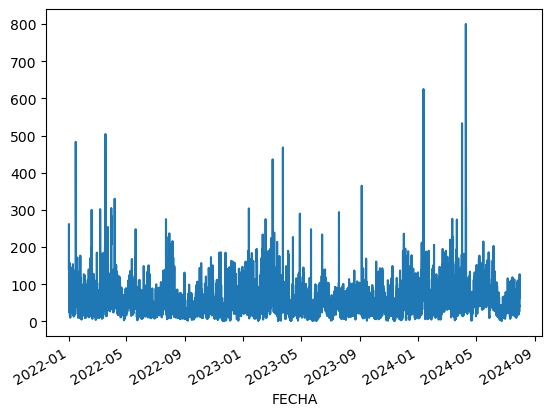

In [40]:
df_time_serie_2022_nonans_nor3['SURESTE PM10 (UG/M3)'].plot()

NameError: name 'imp_' is not defined

In [28]:
df_time_serie_2022_nonans_nor3.to_csv("df_time_serie_2022.csv")